In [18]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("data/database.sqlite 2")
df = pd.read_sql_query("select * from reviews;", conn)
df_years = pd.read_sql_query("select * from years;", conn)
df_genres = pd.read_sql_query("select * from genres", conn)
df_reviews = pd.read_sql_query("select * from content", conn)

In [108]:
df[df['artist'] == 'the flaming lips']

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,genre,num_years_since_release,score_binned
2889,19862,with a little help from my fwends,the flaming lips,http://pitchfork.com/reviews/albums/19862-the-...,5.5,0,stuart berman,contributor,2014-10-27,0,27,10,2014,2014,rock,0,3
4294,18677,peace sword ep,the flaming lips,http://pitchfork.com/reviews/albums/18677-the-...,7.3,0,stuart berman,contributor,2013-10-30,2,30,10,2013,2013,rock,0,4
5190,17804,the terror,the flaming lips,http://pitchfork.com/reviews/albums/17804-the-...,7.8,0,stuart berman,contributor,2013-04-04,3,4,4,2013,2013,rock,0,4
6574,16522,the flaming lips and heady fwends,the flaming lips,http://pitchfork.com/reviews/albums/16522-the-...,8.2,0,stuart berman,contributor,2012-04-20,4,20,4,2012,2012,rock,0,5
10367,13522,embryonic,the flaming lips,http://pitchfork.com/reviews/albums/13522-embr...,9.0,1,stuart berman,contributor,2009-10-12,0,12,10,2009,2009,rock,0,5
11635,12515,christmas on mars,the flaming lips,http://pitchfork.com/reviews/albums/12515-chri...,7.1,0,stuart berman,contributor,2008-12-12,4,12,12,2008,2008,rock,0,4
13975,10437,ufos at the zoo: the legendary concert in okl...,the flaming lips,http://pitchfork.com/reviews/albums/10437-ufos...,8.0,0,stephen m. deusner,None,2007-07-17,1,17,7,2007,2007,rock,0,4
15992,3088,20 years of weird: flaming lips 1986-2006,the flaming lips,http://pitchfork.com/reviews/albums/3088-20-ye...,6.0,0,matt lemay,contributor,2006-04-16,6,16,4,2006,2006,rock,0,3
16062,3086,at war with the mystics,the flaming lips,http://pitchfork.com/reviews/albums/3086-at-wa...,6.7,0,mark richardson,executive editor,2006-04-02,6,2,4,2006,2006,rock,0,4
17814,3087,latenighttales,the flaming lips,http://pitchfork.com/reviews/albums/3087-laten...,7.6,0,chris dahlen,None,2005-03-08,1,8,3,2005,2005,rock,0,4


In [20]:
df = df.merge(df_years).reset_index()
df = df.merge(df_genres).reset_index()
df.year.fillna(value=df.pub_year, inplace=True)
df.drop_duplicates('reviewid',inplace=True)
df.drop(['level_0', 'index'], axis=1, inplace=True)
df.year = df.year.astype(int)

In [21]:
df.sort_values('pub_date', ascending=False)
df.head()

,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,genre
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,1998,electronic
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,2016,metal
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016,rock
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,2016,rock
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017,2016,electronic


In [22]:
df['num_years_since_release'] = df.pub_year - df.year

jk;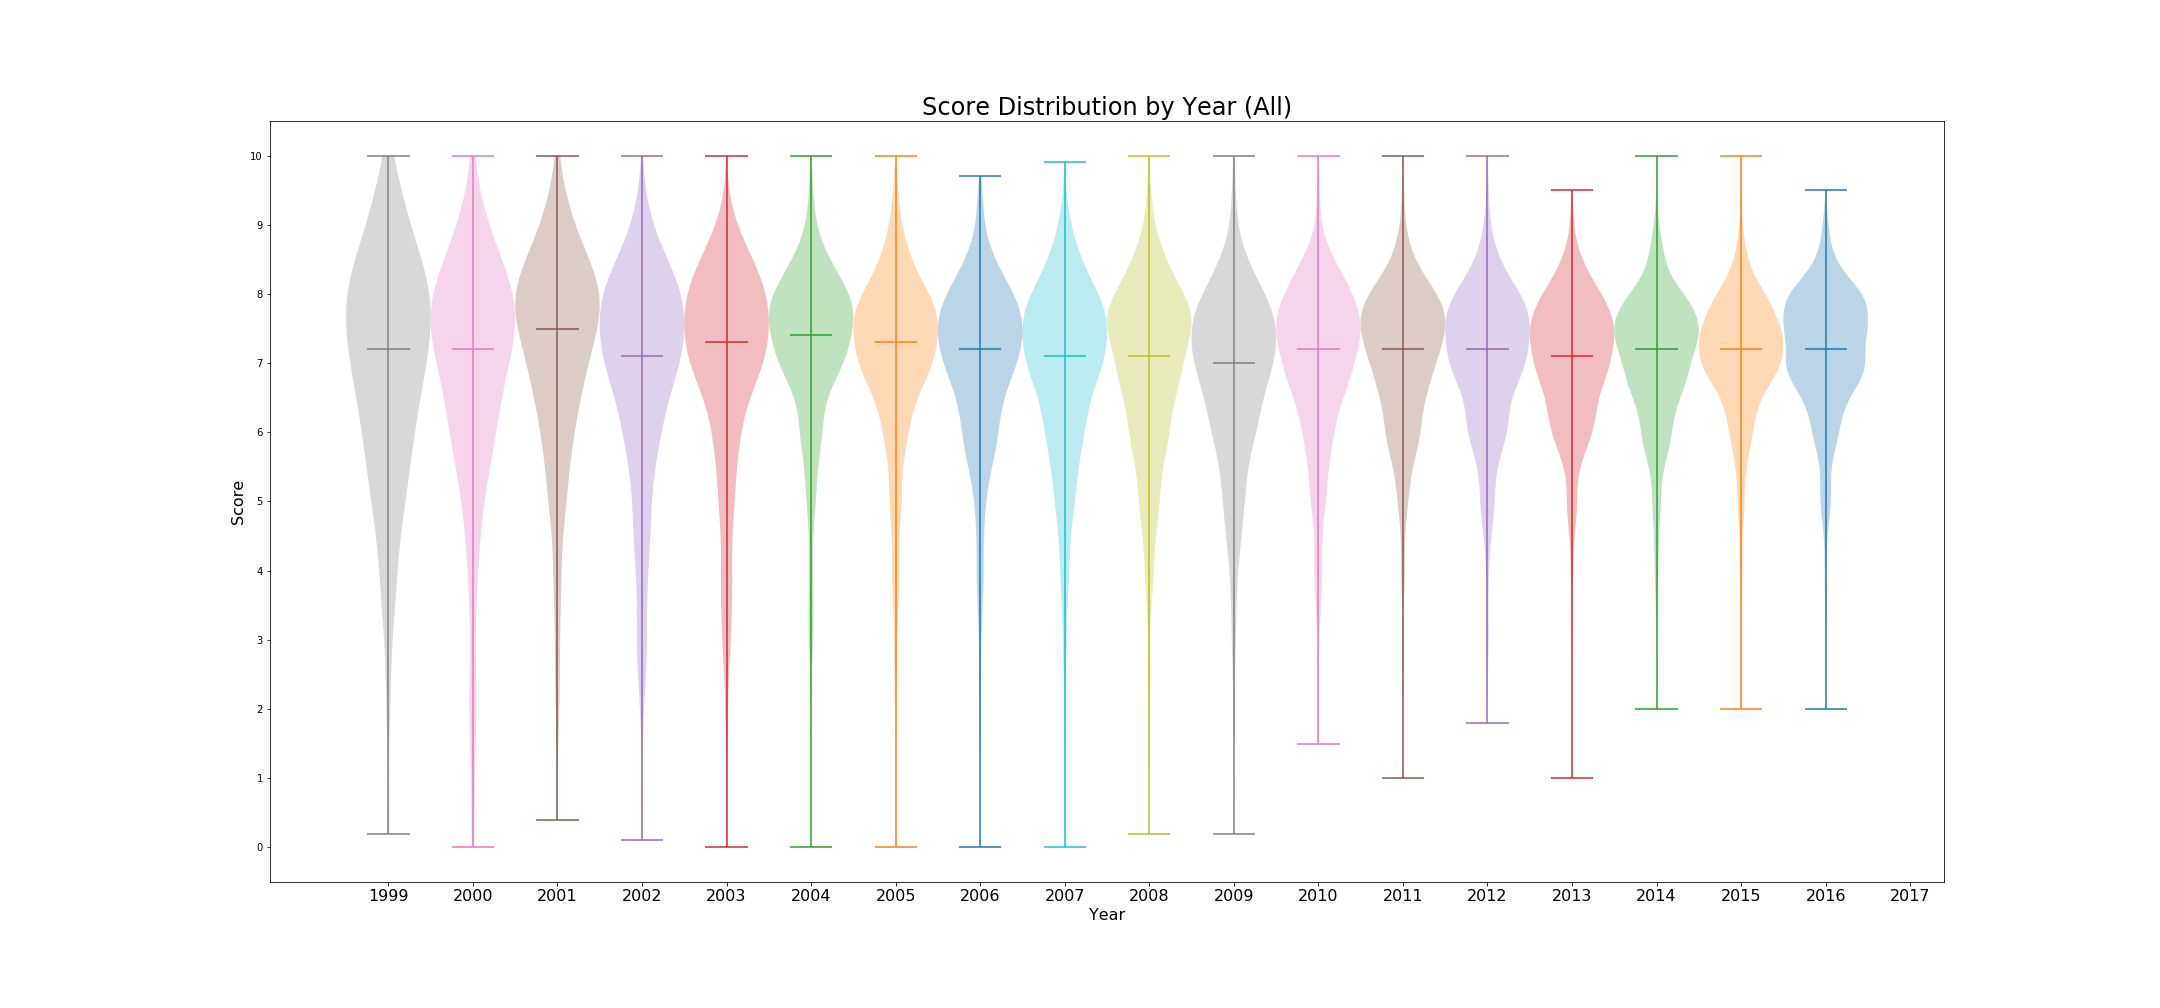

In [23]:
df = df[df.num_years_since_release <= 1]

In [24]:
by_year = df.groupby('pub_year')

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
years = list(df.pub_year.unique())

In [27]:
score_dist = {1999: [],}
for score,year in zip(df.score.astype(list), df.pub_year.astype(list)):
    if year not in score_dist.keys():
        score_dist[year] = []
    else:
        score_dist[year] = score_dist[year] + [score]
   

In [28]:
df['score_binned'] = pd.cut(df['score'], 5, labels=[1,2,3,4,5])

In [29]:
df['score_binned'].value_counts().sort_values()

1      101
2      568
5     2576
3     2746
4    11669
Name: score_binned, dtype: int64

{u'bodies': [<matplotlib.collections.PolyCollection at 0x11cca3dd0>],
 u'cbars': <matplotlib.collections.LineCollection at 0x11cde0310>,
 u'cmaxes': <matplotlib.collections.LineCollection at 0x11ccbc890>,
 u'cmeans': <matplotlib.collections.LineCollection at 0x11cca3c50>,
 u'cmins': <matplotlib.collections.LineCollection at 0x11ccbcdd0>}

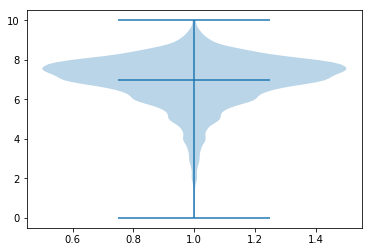

In [30]:
import numpy as np
plt.violinplot(np.array(df['score']), [1], widths=1, showmeans=True)


In [37]:
def plot_violins(df, genre):
    years = list(df.pub_year.unique())
    score_dist = {1999: [],}
    for score,year in zip(df.score.astype(list), df.pub_year.astype(list)):
        if year not in score_dist.keys():
            score_dist[year] = []
        else:
            score_dist[year] = score_dist[year] + [score]

    plt.figure(figsize=(30,14))
    plt.hlines(8.5, 1998, 2018)
    for each in years:
        plt.xticks(years, fontsize=16)
        plt.yticks(range(0,11))
        if each == 2017:
            continue
        plt.violinplot(np.array(score_dist[each]), [each], widths=1,showmedians=True,showextrema=True)
    plt.title('Score Distribution by Year ({})'.format(genre), fontsize=24)
    plt.ylabel('Score', fontsize=16)
    plt.xlabel('Year', fontsize=16)

    plt.savefig('images/{}.png'.format(genre[:3]))

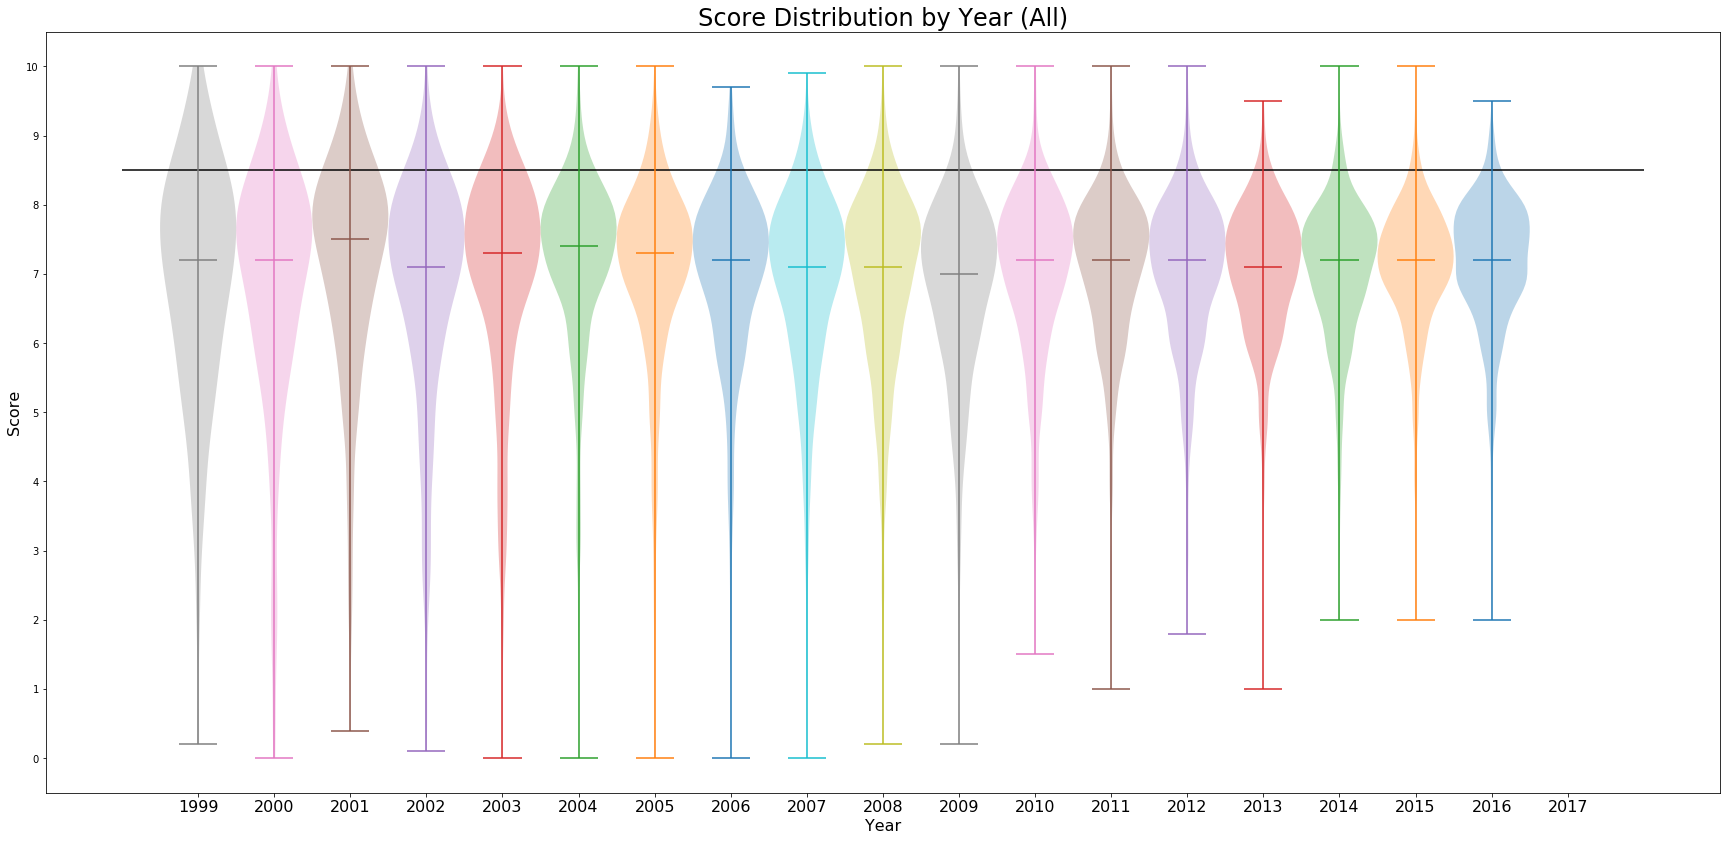

In [38]:
plot_violins(df, "All")

In [16]:
genres = list(df['genre'].unique())
genres = [u'metal',
 u'rock',
 u'electronic',
 u'rap',
 u'experimental',
 u'folk/country',
 u'jazz',
 u'pop/r&b',
 u'global']

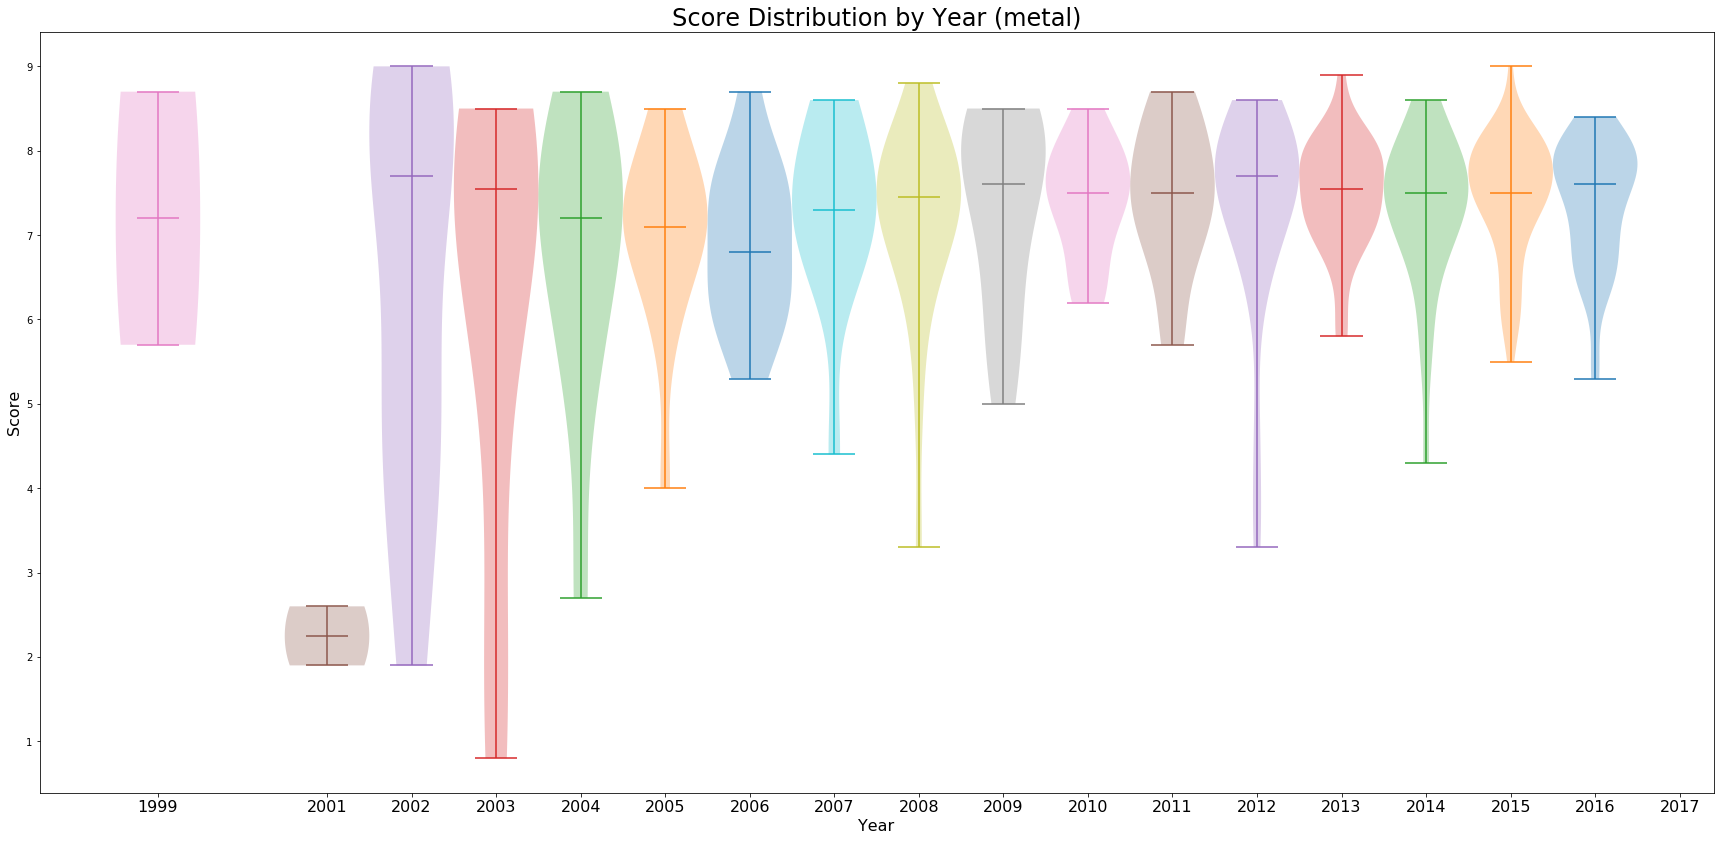

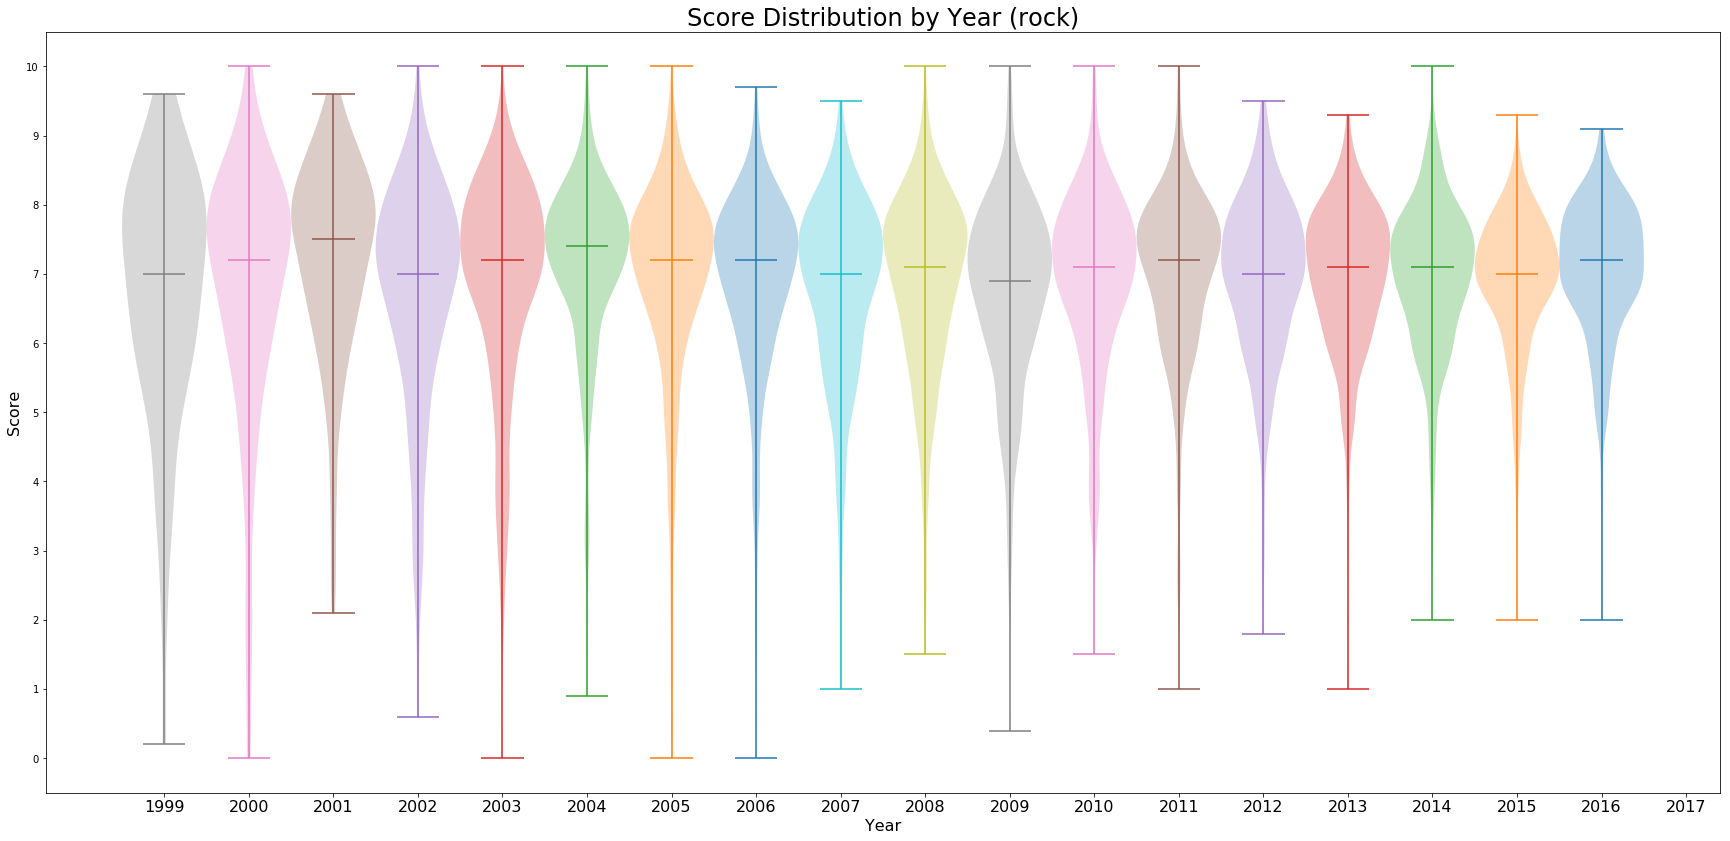

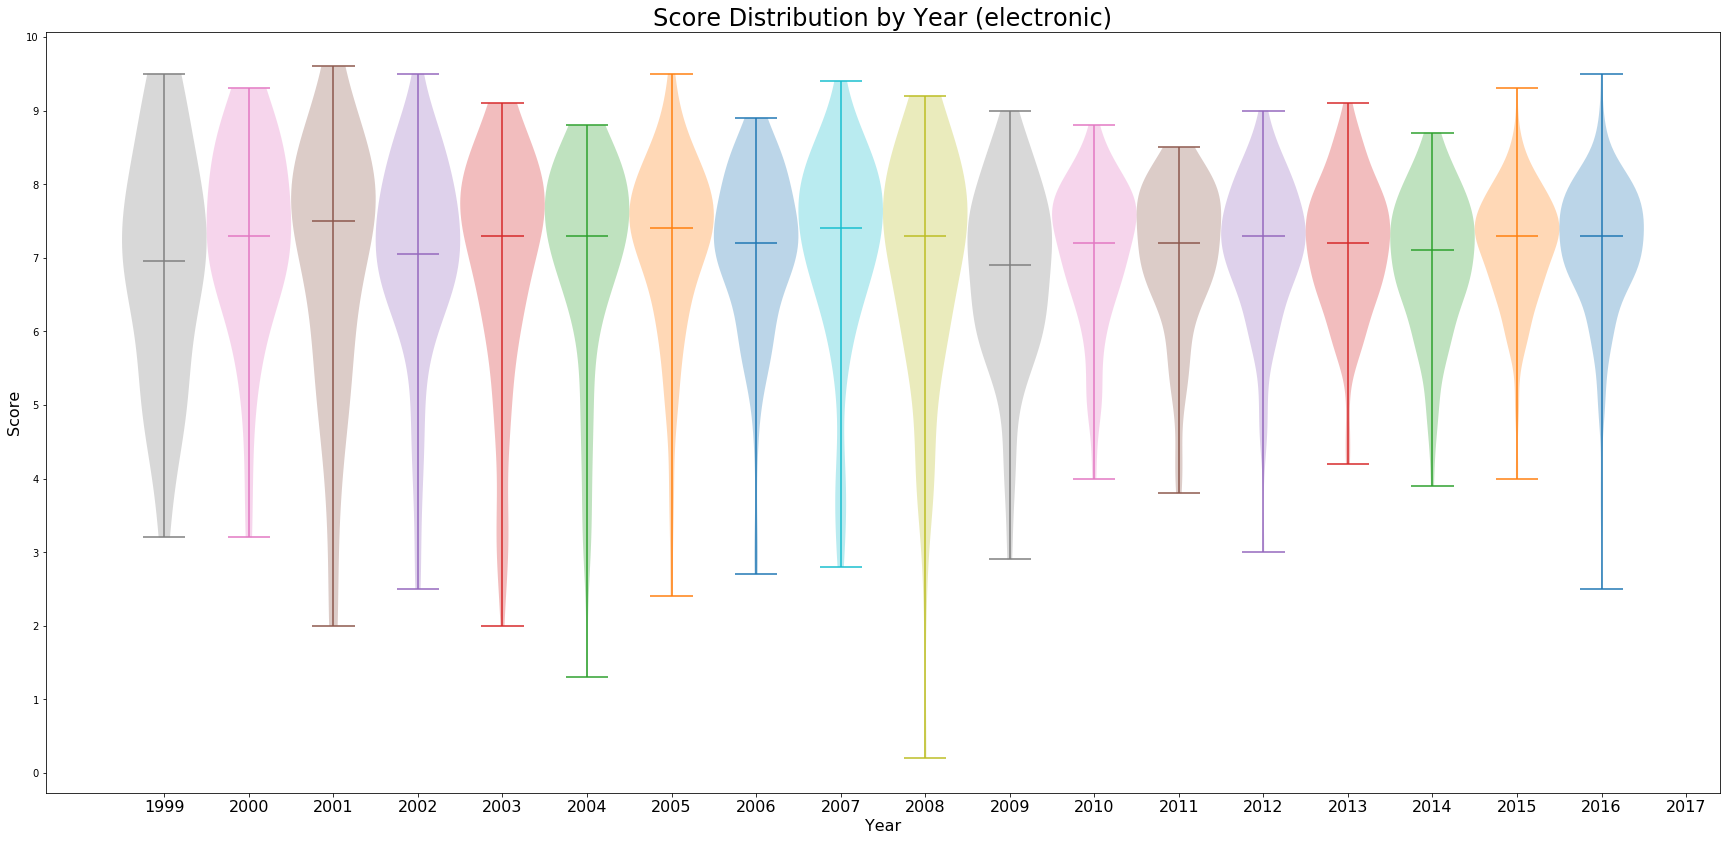

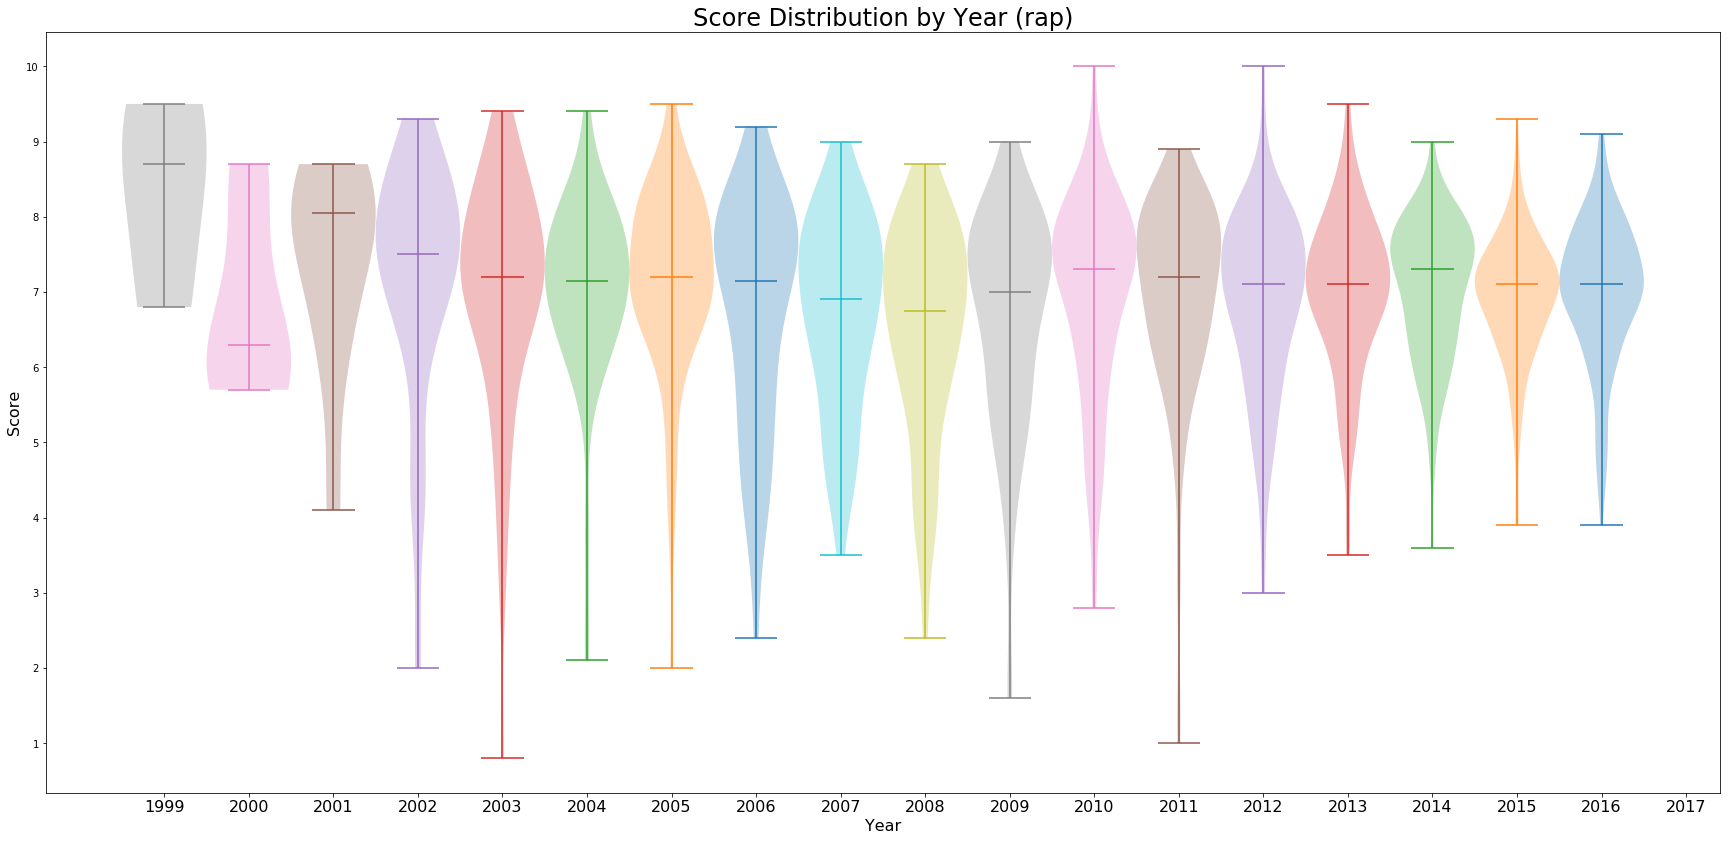

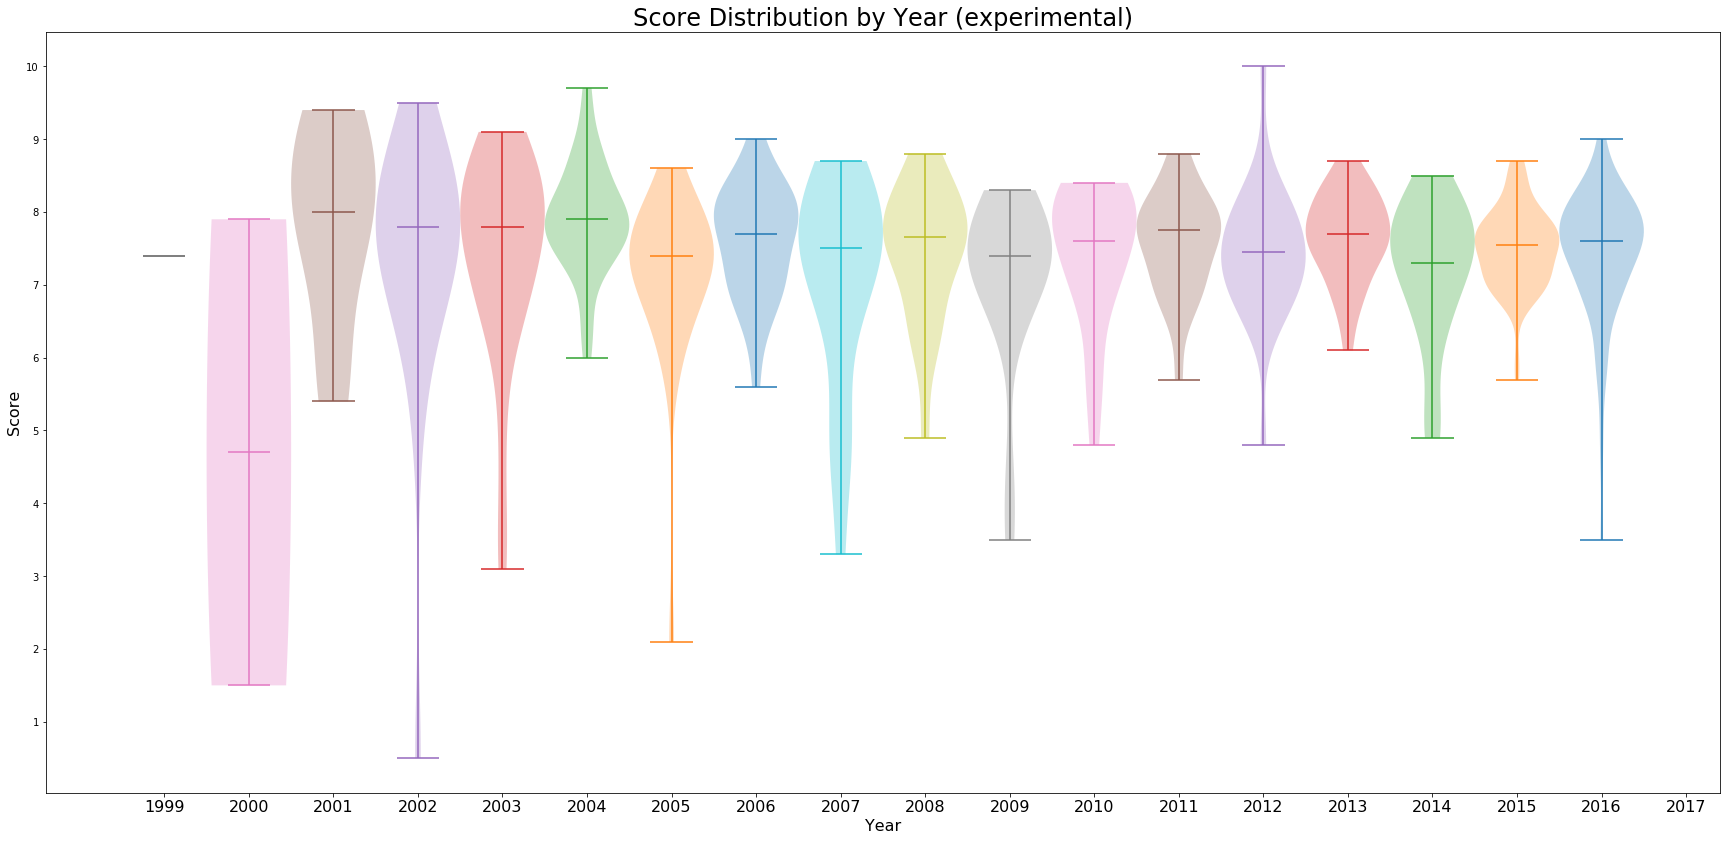

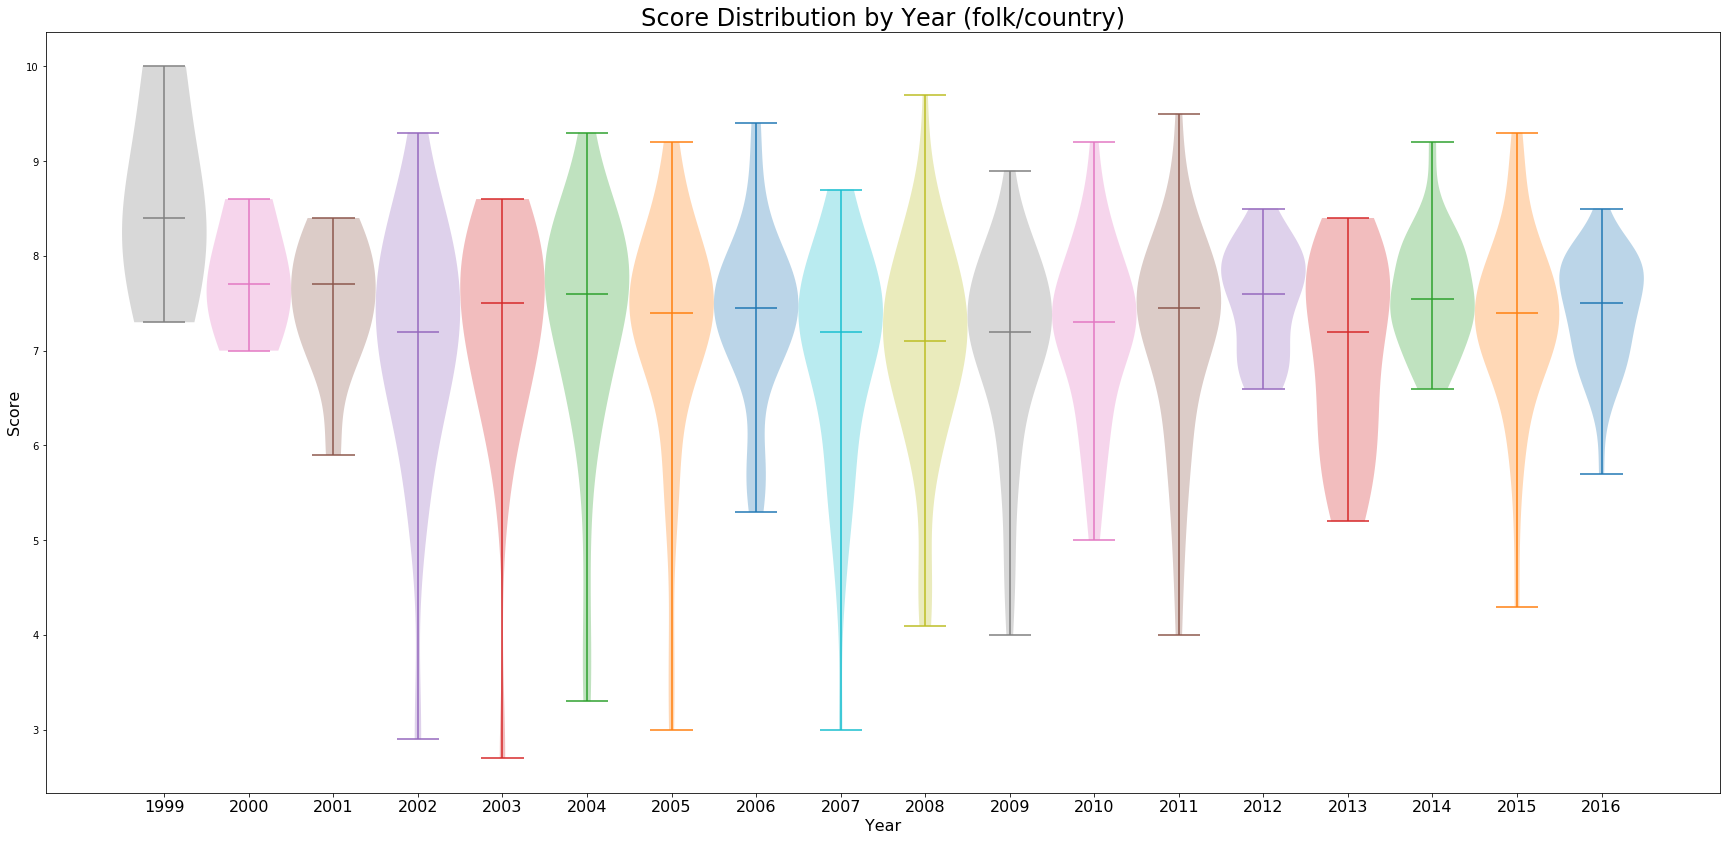

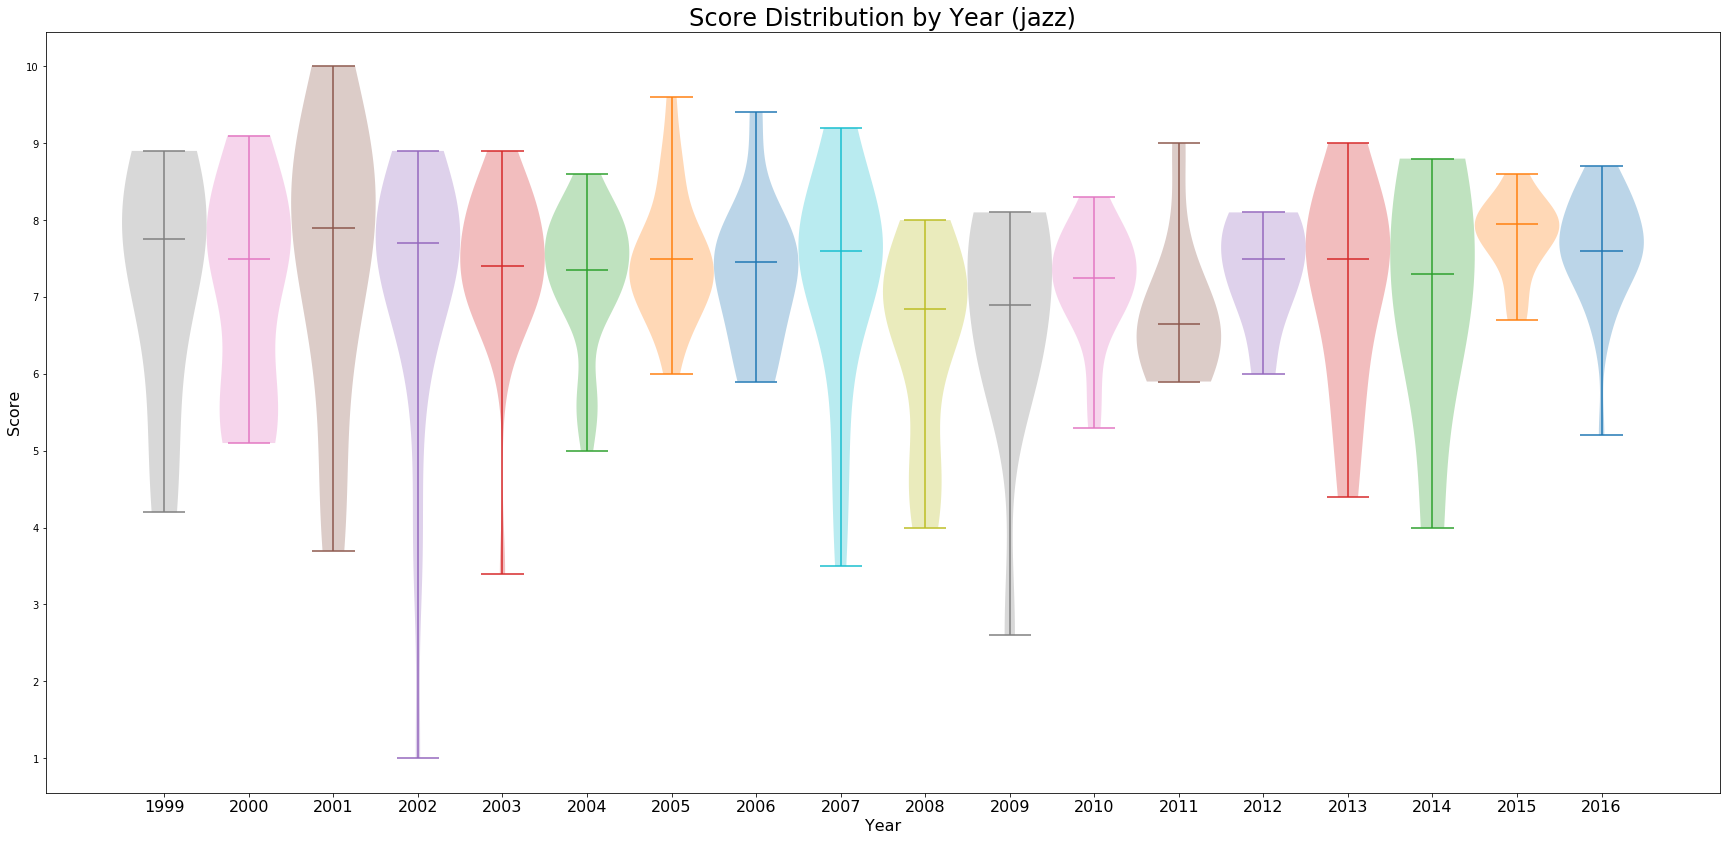

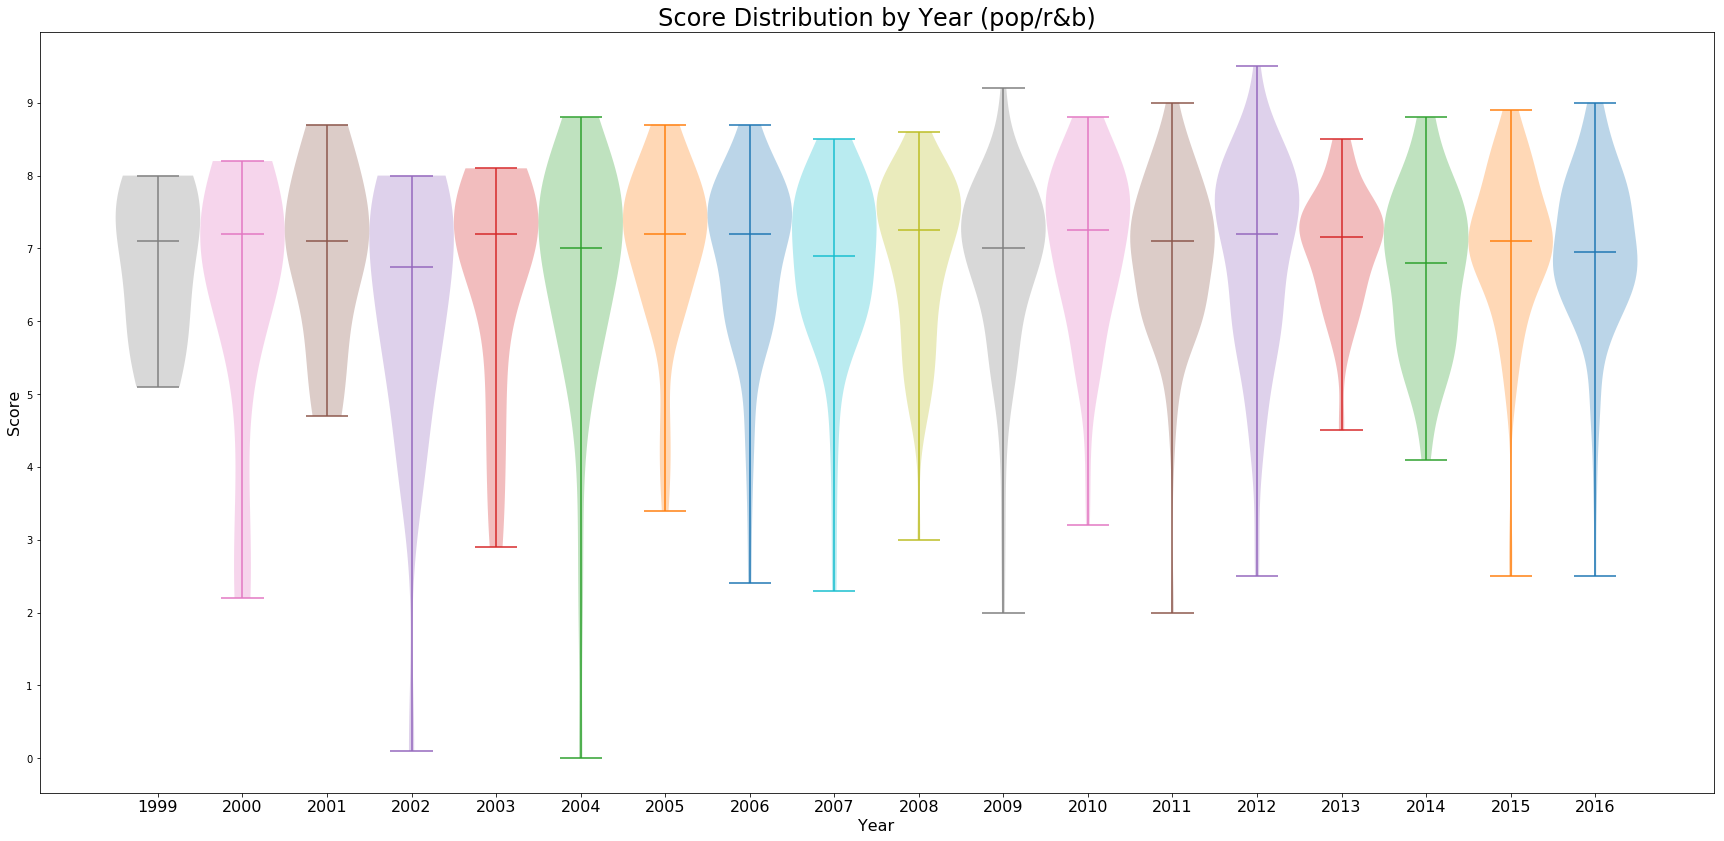

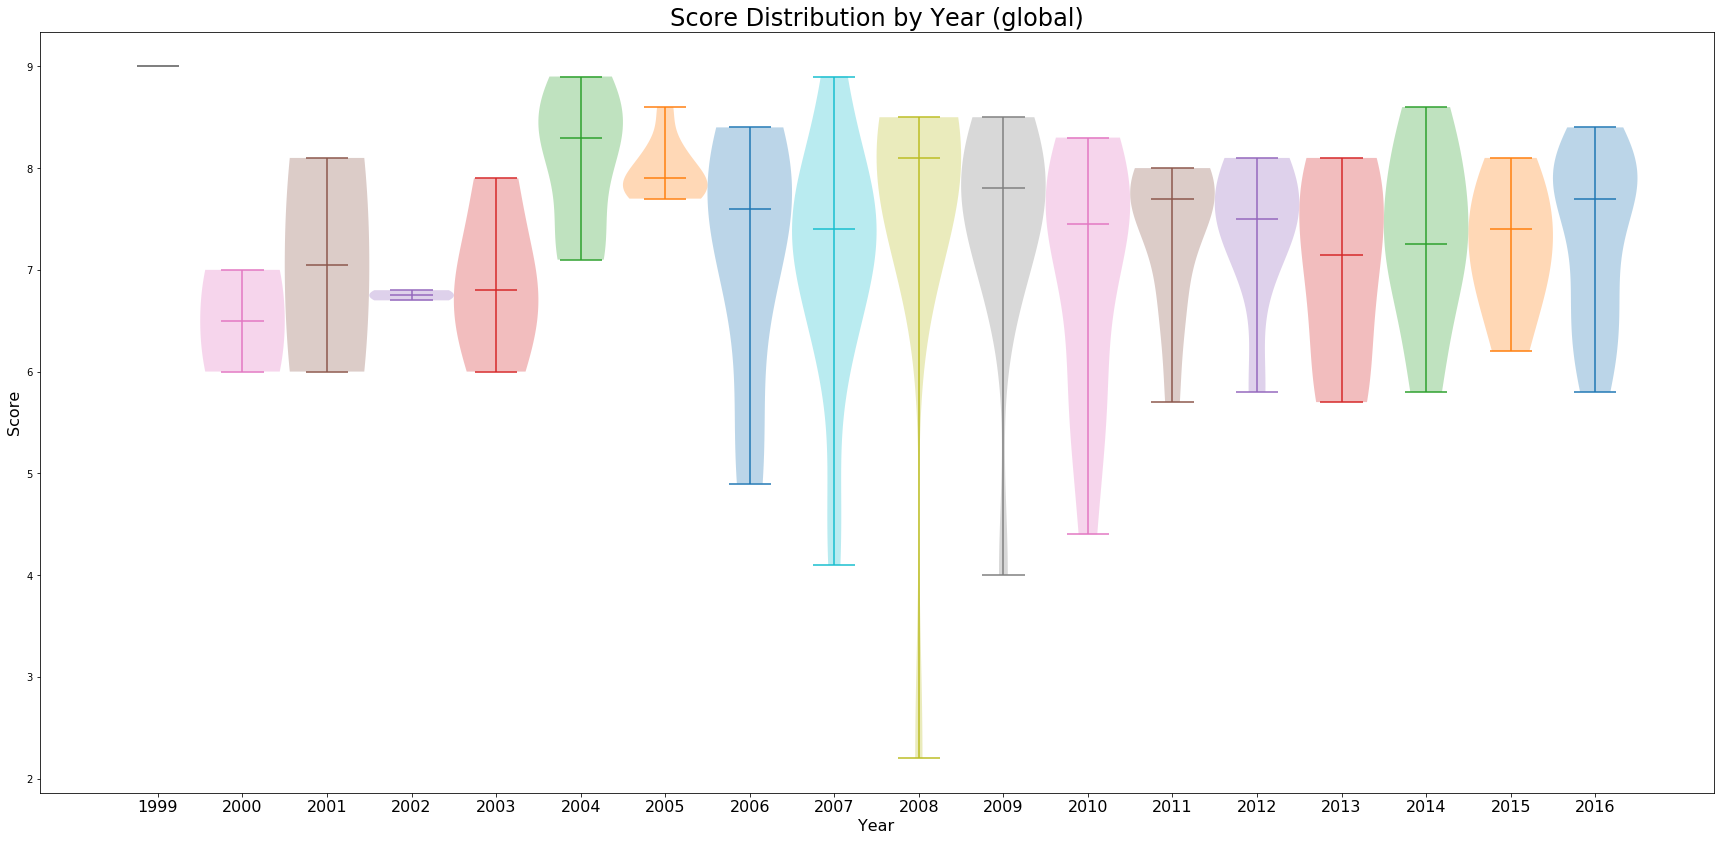

In [17]:
for each in genres:
    plot_violins(df[df['genre'] == each], each)

In [90]:
score_by_year = df.groupby('pub_year').agg(['mean', 'max','min','count','sum']).reset_index()

In [91]:
score_by_year['percent_bnm'] = score_by_year['best_new_music']['sum'] / score_by_year['score']['count']

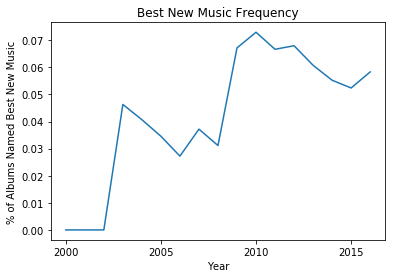

In [106]:
plt.plot(score_by_year['pub_year'][1:18], score_by_year['percent_bnm'][1:18])
plt.title('Best New Music Frequency')
plt.xticks([2000, 2005, 2010, 2015])
plt.xlabel('Year')
plt.ylabel('% of Albums Named Best New Music')
plt.show()

In [55]:
score_by_artist = df.groupby('artist').agg(['mean', 'max','min','count'])['score'].reset_index()

In [19]:
score_by_artist_filtered = score_by_artist[score_by_artist['count'] > 3]

In [20]:
score_by_artist_filtered.sort_values('mean',ascending=False)

,artist,mean,max,min,count
7585,the velvet underground,9.050000,9.4,8.5,4
418,arcade fire,8.975000,9.7,8.4,4
6446,sleater-kinney,8.860000,9.2,8.3,5
3826,kendrick lamar,8.850000,9.5,8.0,4
3586,joanna newsom,8.760000,9.4,8.0,5
1096,caetano veloso,8.700000,9.0,8.1,4
7058,the clash,8.675000,10.0,7.7,4
7988,vampire weekend,8.675000,9.3,8.0,4
4753,miles davis,8.666667,9.5,6.6,12
870,blur,8.585714,9.4,7.0,7
